
# Broker Visualization

Visualizes data from a simulation result broker CSV file.

The csv file must have the following columns: brokerId;latitude;longitude;lcm;leaderId


In [3]:
# imports
import pandas as pd
import seaborn as sns

# vars
dir = "../simulation-result"
filename = "sim-30.0-12000-brokers"

# computed vars
input = dir + "/" + filename + ".csv"
output = dir + "/" + filename + ".pdf"
print("Reading file from " + input)
print("Writing file to " + output)

# Configure seaborn
sns.set(rc={'figure.figsize':(10,5)})
print("seaborn configured")


Reading file from ../simulation-result/sim-30.0-12000-brokers.csv
Writing file to ../simulation-result/sim-30.0-12000-brokers.pdf
seaborn configured


In [4]:
# read in data
df = pd.read_csv(input, sep=";")

# add isLeader column
isMember = (df["brokerId"] != df["leaderId"])
df["isMember"] = isMember

# filter
filtered = df
filtered

,brokerId,latitude,longitude,lcm,leaderId,isMember
0,Skalavik-1234815917,61.8314,-6.6623,1,Reykjavik-1352327190,True
1,Meningie-1036445634,-35.6995,139.3333,1501,Sydney-1036074917,True
2,Porkeri-1234757268,61.4814,-6.7450,1,Reykjavik-1352327190,True
3,Puerto Berrio-1170372171,6.4804,-74.4200,33983,Bogota-1170483426,True
4,West Lafayette-1840010430,40.4432,-86.9239,46269,New York-1840034016,True
...,...,...,...,...,...,...
11995,Paracuru-1076591278,-3.3995,-39.0400,21196,Recife-1076137337,True
11996,Saint Joseph-1840009549,39.7598,-94.8210,80818,Dallas-1840019440,True
11997,Deerfield Beach-1840015136,26.3050,-80.1278,80571,Miami-1840015149,True
11998,Donegal-1372576120,54.6500,-8.1167,2513,Paris-1250015082,True


In [5]:
# print out leaders
df[df["isMember"] == False]["brokerId"].sort_values().tolist()

['Adamstown-1612000000',
 'Anadyr-1643453469',
 'Anchorage-1840023385',
 'Antananarivo-1450978461',
 'Auckland-1554435911',
 'Avarua-1184217570',
 'Bangkok-1764068610',
 'Belem-1076646823',
 'Biak-1360911386',
 'Bogota-1170483426',
 'Broome-1036047905',
 'Bucharest-1642414442',
 'Buenos Aires-1032717330',
 'Cairo-1818253931',
 'Casablanca-1504175315',
 'Chongqing-1156936556',
 'Coari-1076899406',
 'Colombo-1144251314',
 'Dakar-1686604760',
 'Dallas-1840019440',
 'Edinburgh of the Seven Seas-1654661876',
 'Gaalkacyo-1706067930',
 'Grytviken-1239048837',
 'Harbin-1156241528',
 'Honolulu-1840013305',
 'Inukjuak-1124369757',
 'Jakarta-1360771077',
 'Jamestown-1654761576',
 'Johannesburg-1710550792',
 'Kabul-1004993580',
 'Khartoum-1729268475',
 'Kinshasa-1180000363',
 'Kolkata-1356060520',
 'Lagos-1566593751',
 'Lata-1090442496',
 'Lima-1604728603',
 'Los Angeles-1840020491',
 'Lubumbashi-1180506234',
 'Maina-1316874021',
 'Managua-1558296252',
 'Manila-1608618140',
 'Mexico City-148424788

In [6]:
# print out result row
df[df["brokerId"].str.contains("Los Angeles")]

,brokerId,latitude,longitude,lcm,leaderId,isMember
10384,Los Angeles-1840020491,34.1139,-118.4068,12815475,Los Angeles-1840020491,False
10616,Los Angeles-1152810305,-37.4600,-72.3600,145239,Buenos Aires-1032717330,True


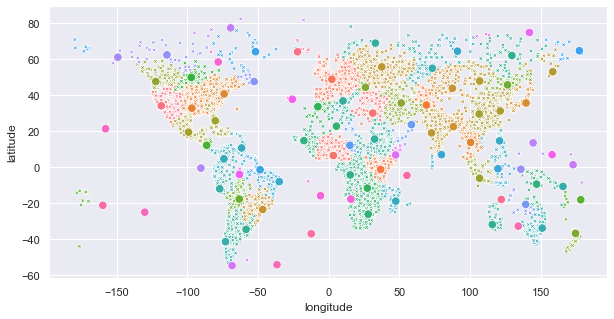

In [7]:
# visualize
tmp = filtered
tmp.sort_values("isMember", inplace=True, ascending=False)
ax = sns.scatterplot(x="longitude", y="latitude", hue="leaderId", style="isMember", size="isMember", legend=False, data=tmp)
ax.get_figure().savefig(output)